In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import folium

In [55]:
df = pd.read_csv('../Dataset/kc/kc_final.csv')

In [56]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [57]:
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [58]:
df['date'] = pd.to_datetime(df['date'])
# if yr_renovated == 0 then put null else put yr_renovated

df['yr_renovated'] = df['yr_renovated'].apply(lambda x: int(x) if x != 0 else None)
# df['yr_renovated'] = pd.to_datetime(df['yr_renovated'], format='%Y')
# df['yr_built'] = pd.to_datetime(df['yr_built'], format='%Y')

# Asumsikan bahwa year built dibuat pada awal tahun. agar bisa dimasukkan kedalam date time format.

In [59]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,NaN,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,NaN,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,NaN,98074,47.6168,-122.045,1800,7503


In [60]:
# # change the date into timestamp
import time

df['date'] = df['date'].apply(lambda x: time.mktime(x.timetuple()))
df['date'].head()

0    1.413133e+09
1    1.418058e+09
2    1.424797e+09
3    1.418058e+09
4    1.424192e+09
Name: date, dtype: float64

In [61]:
# Check if it's correct
# import datetime

# df['date'] = df['date'].apply(lambda x: datetime.datetime.fromtimestamp(x))
# df['date'].head()


In [62]:
df.shape

(21613, 21)

In [63]:
df.isnull().sum()

id                   0
date                 0
price                0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront           0
view                 0
condition            0
grade                0
sqft_above           0
sqft_basement        0
yr_built             0
yr_renovated     20699
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
dtype: int64

In [64]:
df_geo = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.long, df.lat))
df_geo.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,geometry
0,7129300520,1.413133e+09,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,NaN,98178,47.5112,-122.257,1340,5650,POINT (-122.25700 47.51120)
1,6414100192,1.418058e+09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,POINT (-122.31900 47.72100)
2,5631500400,1.424797e+09,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062,POINT (-122.23300 47.73790)
3,2487200875,1.418058e+09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,NaN,98136,47.5208,-122.393,1360,5000,POINT (-122.39300 47.52080)
4,1954400510,1.424192e+09,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,NaN,98074,47.6168,-122.045,1800,7503,POINT (-122.04500 47.61680)


In [65]:
world_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_data.values

array([[889953.0, 'Oceania', 'Fiji', 'FJI', 5496,
        <MULTIPOLYGON (((180 -16.1, 180 -16.6, 179 -16.8, 179 -17, 179 -16.6, 179 -1...>],
       [58005463.0, 'Africa', 'Tanzania', 'TZA', 63177,
        <POLYGON ((33.9 -0.95, 34.1 -1.06, 37.7 -3.1, 37.8 -3.68, 39.2 -4.68, 38.7 -...>],
       [603253.0, 'Africa', 'W. Sahara', 'ESH', 907,
        <POLYGON ((-8.67 27.7, -8.67 27.6, -8.68 27.4, -8.69 25.9, -12 25.9, -11.9 2...>],
       ...,
       [1794248.0, 'Europe', 'Kosovo', '-99', 7926,
        <POLYGON ((20.6 41.9, 20.5 42.2, 20.3 42.3, 20.1 42.6, 20.3 42.8, 20.5 42.9,...>],
       [1394973.0, 'North America', 'Trinidad and Tobago', 'TTO', 24269,
        <POLYGON ((-61.7 10.8, -61.1 10.9, -60.9 10.9, -60.9 10.1, -61.8 10, -62 10....>],
       [11062113.0, 'Africa', 'S. Sudan', 'SSD', 11998,
        <POLYGON ((30.8 3.51, 30 4.17, 29.7 4.6, 29.2 4.39, 28.7 4.46, 28.4 4.29, 28...>]],
      dtype=object)

In [66]:
# axis = world_data[world_data.continent == 'Midwest America'].plot(color='white', edgecolor='black')

In [67]:
kc_data = gpd.read_file('../Dataset/tl_2022_us_state.shp')
print(kc_data.head())

  REGION DIVISION STATEFP   STATENS GEOID STUSPS           NAME LSAD  MTFCC  \
0      3        5      54  01779805    54     WV  West Virginia   00  G4000   
1      3        5      12  00294478    12     FL        Florida   00  G4000   
2      2        3      17  01779784    17     IL       Illinois   00  G4000   
3      2        4      27  00662849    27     MN      Minnesota   00  G4000   
4      3        5      24  01714934    24     MD       Maryland   00  G4000   

  FUNCSTAT         ALAND       AWATER     INTPTLAT      INTPTLON  \
0        A   62266456923    489045863  +38.6472854  -080.6183274   
1        A  138962819934  45971472526  +28.3989775  -082.5143005   
2        A  143778515726   6216539665  +40.1028754  -089.1526108   
3        A  206244837557  18937184315  +46.3159573  -094.1996043   
4        A   25151771744   6979295311  +38.9466584  -076.6744939   

                                            geometry  
0  POLYGON ((-77.75438 39.33346, -77.75422 39.333...  
1  MUL

<Figure size 2000x1000 with 0 Axes>

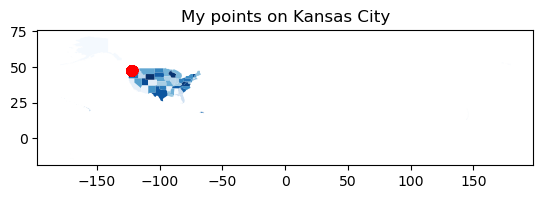

In [68]:
plt.figure(figsize=(20, 10))
point_gdf = gpd.GeoDataFrame(df_geo[['geometry']]) 

# Combine into a single GeoDataFrame (optional)
combined_data = gpd.GeoDataFrame(pd.concat([kc_data, point_gdf]), geometry='geometry')

combined_data.plot(column='NAME', cmap='Blues')  # Choose desired color scheme
plt.scatter(point_gdf.geometry.x, point_gdf.geometry.y, c='red', zorder=2)
plt.title("My points on Kansas City")
plt.show()

In [69]:
# m = folium.Map(location=[39.0997, -94.5786], zoom_start=10)
# folium.CircleMarkers(location_list=list(point_gdf.geometry.y), 
#                     latitudes=list(point_gdf.geometry.x), 
#                     radius=5, 
#                     color='red', 
#                     fill_color='red', 
#                     fill_opacity=0.7).add_to(m)

# Data Preparation

In [70]:
df.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,914.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,1.414532e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,1995.827133,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,9.767348e+06,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,15.517107,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,1.398964e+09,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,1934.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,1.405962e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,1987.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,1.413392e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,2000.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,1.424106e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,2007.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,1.432660e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [71]:
# split the price into 10 categories 0-100k, 100k-200k, 200k-300k, 300k-400k, 400k-500k, 500k-600k, 600k-700k, 700k-800k, 800k-900k, 900k-1M


<Axes: xlabel='long', ylabel='lat'>

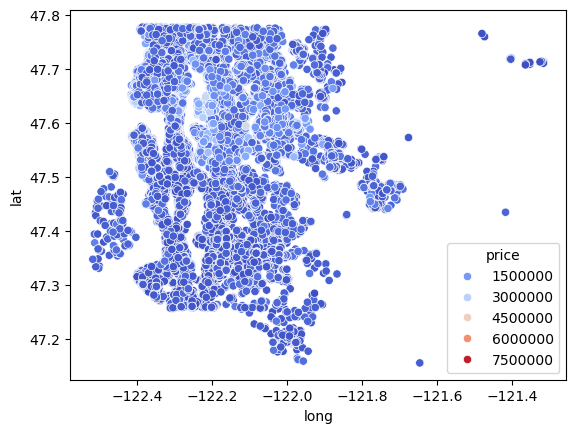

In [83]:
sns.scatterplot(x="long", y="lat", hue="price", data=df, palette='coolwarm' )

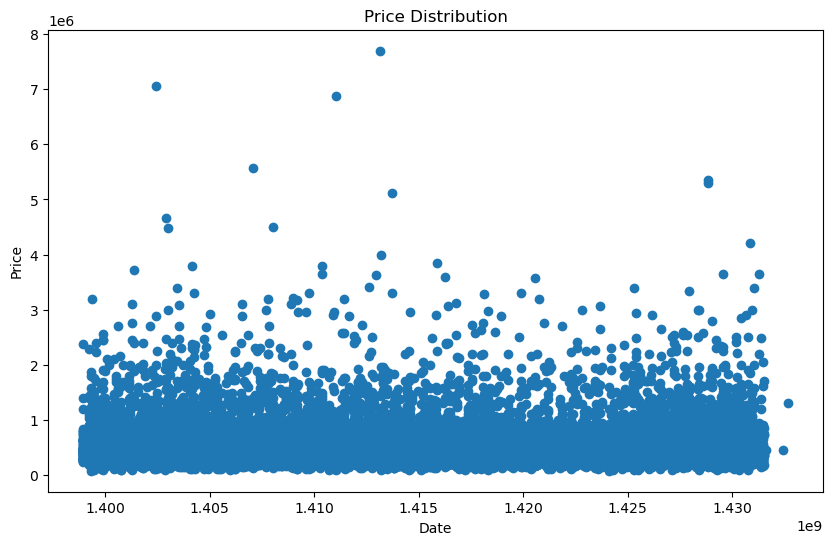

In [73]:
# plot the price distribution for date
plt.figure(figsize=(10,6))
plt.scatter(df['date'],df['price'])
plt.title('Price Distribution')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


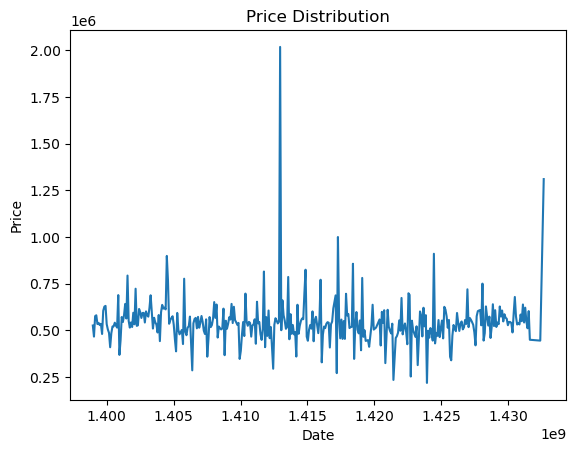

In [74]:
# create a mean for price on the same date
df_date = df.groupby('date').mean()
df_date['price'].plot()
plt.title('Price Distribution')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


In [75]:
df.dtypes

id                 int64
date             float64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

# Corelation Between features


<Axes: >

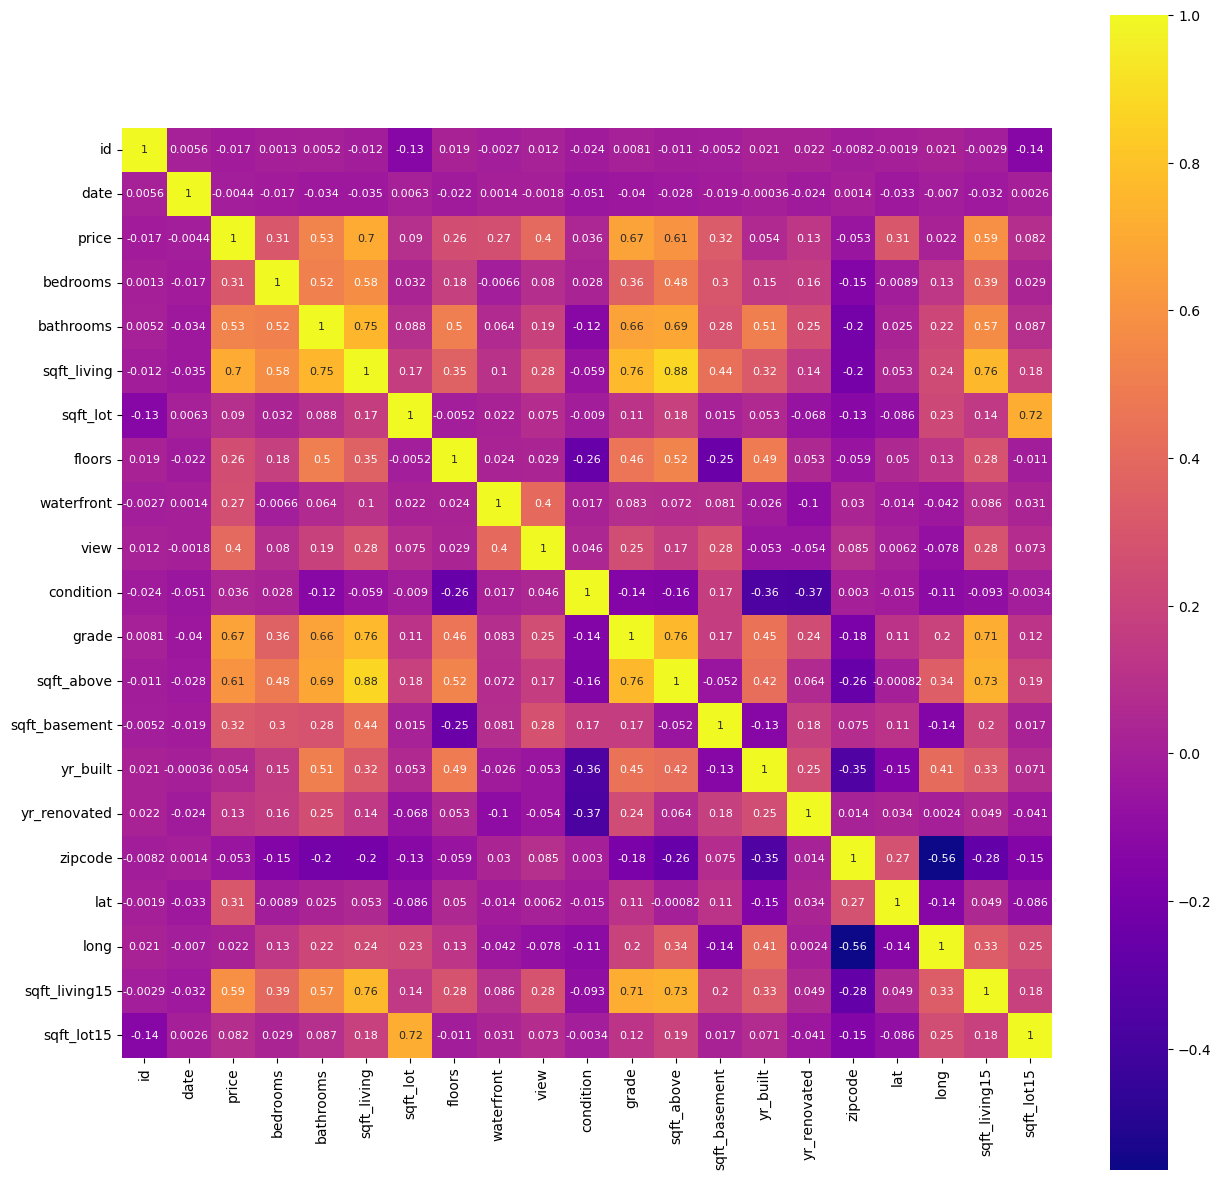

In [76]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), cbar=True,square=True, annot=True, annot_kws={'size' : 8},cmap='plasma')

In [77]:
# from sklearn.ensemble import RandomForestRegressor

# from sklearn.metrics import mean_squared_error, r2_score

# # drop price and yr renovated in X
# X = df.drop(['price', 'yr_renovated'], axis=1)
# y = df['price']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# rf = RandomForestRegressor()
# rf.fit(X_train, y_train)

# rf.score(X_test, y_test)


In [78]:
# put lat and long in a x
# x = df[['lat', 'long']]
x = df.drop(['id','price', 'yr_renovated'], axis=1)
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [79]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()

# x_train = sc.fit_transform(x_train)
# x_test = sc.transform(x_test)

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# RF lat long

In [80]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
rf.predict(x_test)
print(r2_score(y_test, rf.predict(x_test)))

print(rf.score(x_test, y_test))

0.8577185870491065
0.8577185870491065


# polynom

In [81]:
    from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=5)
x_poly = poly_reg.fit_transform(x_train)
pol_reg = LinearRegression()
pol_reg.fit(x_poly, y_train)

pol_reg.score(poly_reg.fit_transform(x_test), y_test)


MemoryError: Unable to allocate 3.79 GiB for an array with shape (15129, 33649) and data type float64

# DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

dt.score(x_test, y_test)

0.71873211742283

# SVR

In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel='sigmoid')
svr.fit(x_train, y_train)

svr.score(x_test, y_test)

-0.06359523426345959

# XGBOOST

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(x_train, y_train)

xgb.score(x_test, y_test)


0.873882804407062